<a href="https://colab.research.google.com/github/jahelsantiago/Sings-language-CNN/blob/master/Sings_laguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
from google.colab import files
from tensorflow import keras as k

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
uploaded=files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


## Extract the data and pre-process it

First we extract the data from the csv file and divide them into the respective train and test, for this we will use the function [**read_csv** ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
from  pandas library to generate a data frame from these and be able to explore the format in which they give it to us.

In [78]:
df_train = pd.read_csv("/content/sign_mnist_train.csv") #creamos un data frame con el train
df_test = pd.read_csv("/content/sign_mnist_test.csv") #creamos un data frame con el test 

We print the data frame of the test data.

In [97]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


We can see that it is 7172 rows × 785 columns, where each row represents an image and each column represents a pixel, so we need to create a function to resize and extract the data into a numpy array.
For this we will use the  [dataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) and [dataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html) functions.

In [82]:
def split_images(df_data):
  labels = df_data["label"].to_numpy() #get the lables an cast to numpy array
  images = df_data.iloc[:,1:].to_numpy() #get all the images in a numpy array 
  images = images.reshape(-1,28,28)#reshape to (?,28,28) 
  return labels, images 

In [101]:
train_labels, train_images = split_images(df_train)
test_labels, test_images = split_images(df_test)
print(train_labels.shape)
print(train_images.shape)
print(test_labels.shape)
print(test_images.shape)

(27455,)
(27455, 28, 28)
(7172,)
(7172, 28, 28)


we print some images to better see the data set

<Figure size 432x288 with 0 Axes>

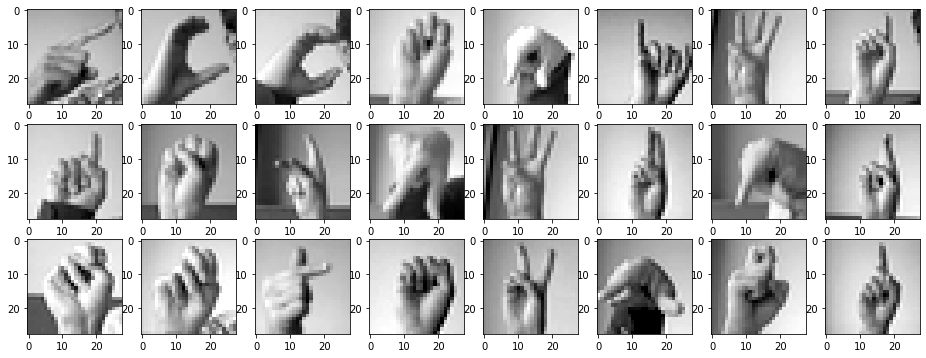

In [85]:
import matplotlib.pyplot as plt

columns = 8
rows = 3

plt.gray()
fig=plt.figure(figsize=(columns*2, rows*2))
for i in range(1, columns*rows +1):
    img = train_images[i]
    fig.add_subplot(rows, columns, i)    
    plt.imshow(img)
    
plt.show()

Reshape the images from (28,28) a (28,28,1) for be prosses by tensorflow

In [103]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis = 3)
print(train_images.shape)
print(test_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In order to get new data we use [ImageDataGenerator](https://keras.io/api/preprocessing/image/) a class how Generate batches of tensor image data with real-time data augmentation to create new images. 

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #module for data augmentation
#create instance for image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255, #normalize each image dividing by 255
    rotation_range=15, #assing a random rotation up to 15 degrees
    width_shift_range=0.2, #assigns a random shift up to 20% in vertical dim
    height_shift_range=0.2, #assigns a random shift up to 20% in horizontal dim
    shear_range=0.2, #assing Shear angle in counter-clockwise direction in degrees 
    zoom_range=0.2, #assing a random zoom range up to 20%
)

#
test_datagen = ImageDataGenerator(
    rescale = 1./255      
)

definimos el modelo

In [106]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape = (28,28,1), activation= "relu"),
    tf.keras.layers.MaxPool2D((2,2),2),
    tf.keras.layers.Conv2D(32,(3,3), activation= "relu"),
    tf.keras.layers.MaxPool2D((2,2),2),
    tf.keras.layers.Flatten(),        
    tf.keras.layers.Dense(256, activation= "relu"),    
    tf.keras.layers.Dense(128, activation= "relu"),
    tf.keras.layers.Dense(25, activation="softmax")                                             
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])

train_generator = train_datagen.flow(train_images, train_labels, batch_size = 64)
test_datagenerator = test_datagen.flow(test_images,test_labels, batch_size = 64)

history = model.fit_generator(train_generator, validation_data = test_datagenerator, epochs = 30)

Epoch 1/30
429/429 [==============================] - 8s 18ms/step - loss: 2.5941 - acc: 0.2179 - val_loss: 1.5728 - val_acc: 0.4940
Epoch 2/30
429/429 [==============================] - 8s 18ms/step - loss: 1.5311 - acc: 0.5051 - val_loss: 0.8290 - val_acc: 0.7033
Epoch 3/30
429/429 [==============================] - 8s 18ms/step - loss: 1.0660 - acc: 0.6451 - val_loss: 0.5523 - val_acc: 0.8105
Epoch 4/30
429/429 [==============================] - 8s 19ms/step - loss: 0.8071 - acc: 0.7304 - val_loss: 0.3745 - val_acc: 0.8622
Epoch 5/30
429/429 [==============================] - 8s 18ms/step - loss: 0.6694 - acc: 0.7760 - val_loss: 0.2561 - val_acc: 0.9292
Epoch 6/30
429/429 [==============================] - 8s 18ms/step - loss: 0.5562 - acc: 0.8134 - val_loss: 0.2527 - val_acc: 0.8971
Epoch 7/30
429/429 [==============================] - 8s 18ms/step - loss: 0.4899 - acc: 0.8343 - val_loss: 0.2470 - val_acc: 0.9177
Epoch 8/30
429/429 [==============================] - 8s 18ms/step - 

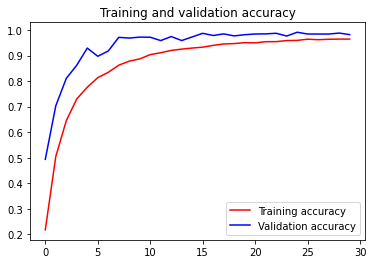

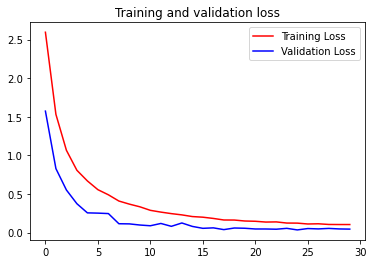

In [107]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()